In [5]:
import pandas as pd
data=pd.read_csv("C:/Users/user/Desktop/data set/zoo3.csv")
df=pd.read_csv("C:/Users/user/Desktop/data set/zoo2.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  70 non-null     object
 1   hair         70 non-null     int64 
 2   feathers     70 non-null     int64 
 3   eggs         70 non-null     int64 
 4   milk         70 non-null     int64 
 5   airborne     70 non-null     int64 
 6   aquatic      70 non-null     int64 
 7   predator     70 non-null     int64 
 8   toothed      70 non-null     int64 
 9   backbone     70 non-null     int64 
 10  breathes     70 non-null     int64 
 11  venomous     70 non-null     int64 
 12  fins         70 non-null     int64 
 13  legs         70 non-null     int64 
 14  tail         70 non-null     int64 
 15  domestic     70 non-null     int64 
 16  catsize      70 non-null     int64 
 17  class_type   70 non-null     int64 
dtypes: int64(17), object(1)
memory usage: 10.0+ KB


In [8]:
da=pd.concat([data,df])

In [9]:
da.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 42
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  113 non-null    object
 1   hair         113 non-null    int64 
 2   feathers     113 non-null    int64 
 3   eggs         113 non-null    int64 
 4   milk         113 non-null    int64 
 5   airborne     113 non-null    int64 
 6   aquatic      113 non-null    int64 
 7   predator     113 non-null    int64 
 8   toothed      113 non-null    int64 
 9   backbone     113 non-null    int64 
 10  breathes     113 non-null    int64 
 11  venomous     113 non-null    int64 
 12  fins         113 non-null    int64 
 13  legs         113 non-null    int64 
 14  tail         113 non-null    int64 
 15  domestic     113 non-null    int64 
 16  catsize      113 non-null    int64 
 17  class_type   113 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 16.8+ KB


In [10]:
da.duplicated().sum()

0

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
da['class_type'].value_counts()

2    20
3    20
1    19
6    17
4    15
5    12
7    10
Name: class_type, dtype: int64

In [22]:
da['class_type'].nunique()

7

In [28]:
labels=da['class_type']

In [29]:
da.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

<AxesSubplot:>

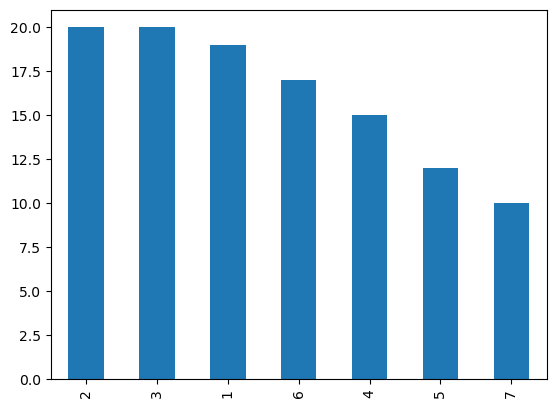

In [35]:
f,ax=plt.subplots()
labels.value_counts().plot(ax=ax,kind='bar')

In [37]:
da.shape

(113, 18)

In [39]:
from sklearn.cluster import AgglomerativeClustering

In [40]:
from sklearn.metrics import pairwise_distances

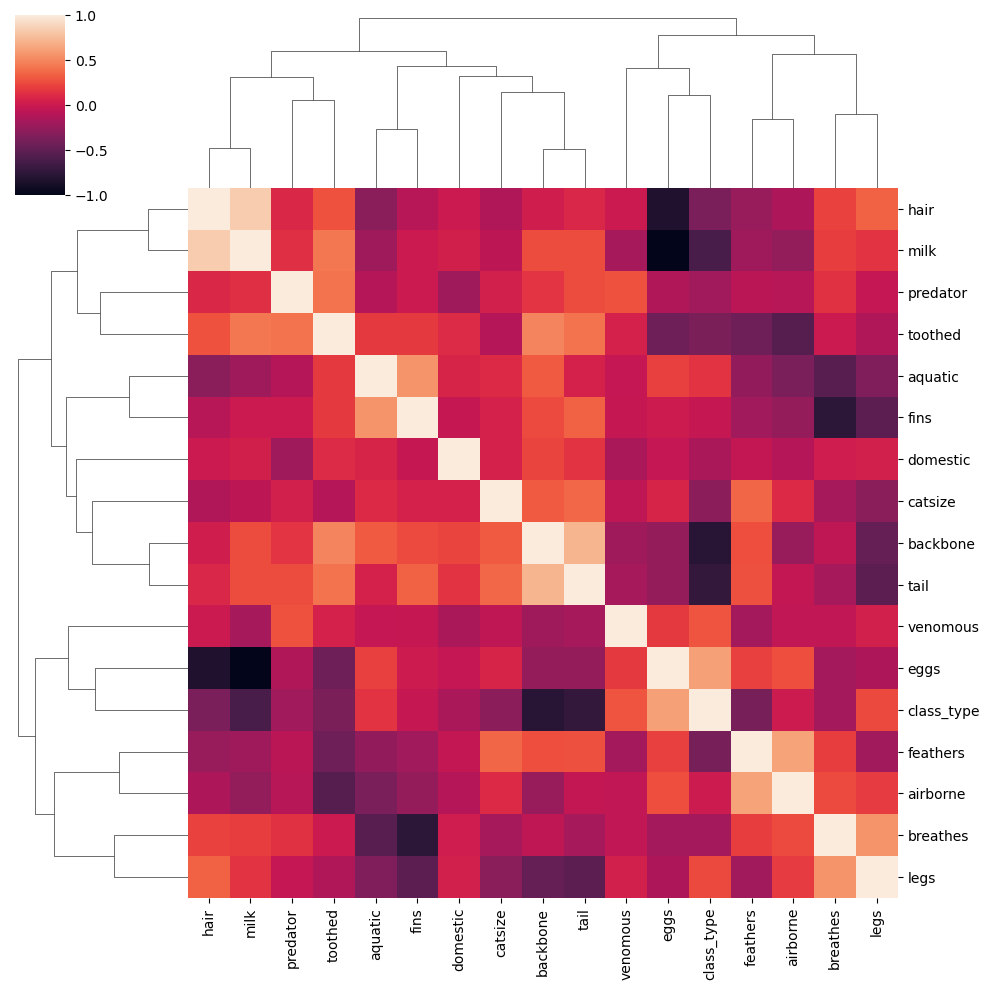

In [41]:
sns.clustermap(da.corr())

In [47]:
da.drop('animal_name',axis=1,inplace=True)

In [61]:
model=AgglomerativeClustering(n_clusters=7,affinity='cosine',linkage='average')

In [62]:
model.fit(da)

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=7)

In [63]:
model.labels_

array([3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 4, 2, 2,
       2, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 0, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0,
       0, 0, 0], dtype=int64)

In [64]:
import numpy as np
print(np.unique(model.labels_))

[0 1 2 3 4 5 6]


In [65]:
labels=labels-1

In [66]:
from sklearn.metrics import mean_squared_error

In [68]:
score=mean_squared_error(labels,model.labels_)
ab=np.sqrt(score)
print(ab)

2.4204146503535333
